
# Optimizers

Optimizers are a key part of the algorithms that train neural networks. The original optimizer is gradient descent, and the concept of gradient descent is effectively the foundation of all optmizers (as well as fundamental to machine learning). Unlike activation functions, optimzers are a part of training the network, not a component of the network itself. In fact, the same optimizers that are used in Deep Neural Networks are used in a variety of other machine learning models as well.

Optimizers, and the parameters of optimizers, can have profound impacts on training. Similar to activation functions, there isn't a "one true optimizer". Different optimizers might perform better on different datasets or in different neural network architectures. Once again, empirical testing is a good way to suss out the effectiveness of an optimizer.

In this lab we're going to explore several different optimizers in the context of two deep nerual network architectures and continue using the MNIST digits dataset.


In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

(X_train_0, y_train_0),(X_test_0,y_test_0) = mnist.load_data()
print("Shape of train data, after loading from dataset: ", X_train_0.shape)
number_of_features = X_train_0[0].shape[0] * X_train_0[0].shape[1] 
unique_outcomes = np.unique(y_train_0)
number_of_unique_outcomes = len(unique_outcomes)

X_train = X_train_0.reshape(len(X_train_0), number_of_features)
X_test = X_test_0.reshape(len(X_test_0), number_of_features)

y_train = keras.utils.to_categorical(y_train_0, 
                                     num_classes=number_of_unique_outcomes,
                                     dtype='int')
y_test = keras.utils.to_categorical(y_test_0, 
                                     num_classes=number_of_unique_outcomes,
                                     dtype='int')

def model_accuracy_plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['training_data', 'validation_data'], loc='best')
    plt.show()

Using TensorFlow backend.


Shape of train data, after loading from dataset:  (60000, 28, 28)


In [8]:
def model_1(number_of_features, number_of_unique_outcomes):
    model = Sequential()
    model.add(Dense(units = 256,
                    activation = 'relu',
                    input_shape = (number_of_features, )))
    model.add(Dense(units = number_of_unique_outcomes,
                    activation = 'softmax'))
    return model

def model_2(number_of_features, number_of_unique_outcomes):
    model = Sequential()
    model.add(Dense(units = 10,
                    activation = 'relu',
                    input_shape = (number_of_features, )))
    for i in range(10):
        model.add(Dense(units = 10,
                        activation = 'relu'))
    model.add(Dense(units = number_of_unique_outcomes,
                    activation = 'softmax'))
    return model

In [20]:
optimizers = [
    'sgd',
    'rmsprop',
    'adadelta',
    'adam',
    'adamax',
    'nadam'
]

# So we can plot them on one chart
history_list = []

10000/10000 [==============================] - 0s 47us/step

sgd
Training time:  233.171875


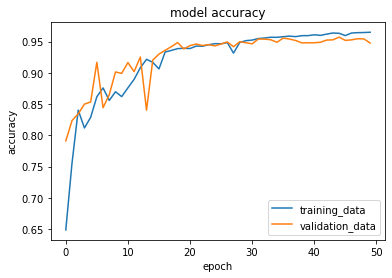


Tetsing data with sgd optimizer accuracy:  0.94

Tetsing data with sgd optimizer loss:  0.28
10000/10000 [==============================] - 0s 31us/step

rmsprop
Training time:  315.109375


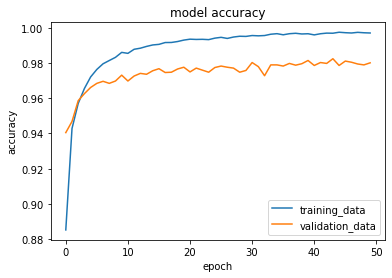


Tetsing data with rmsprop optimizer accuracy:  0.98

Tetsing data with rmsprop optimizer loss:  1.23
10000/10000 [==============================] - 0s 31us/step

adadelta
Training time:  412.09375


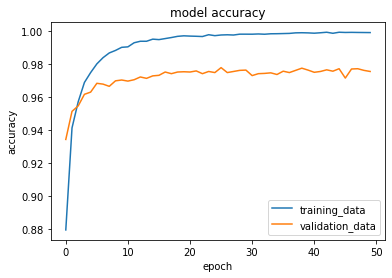


Tetsing data with adadelta optimizer accuracy:  0.97

Tetsing data with adadelta optimizer loss:  0.67
10000/10000 [==============================] - 0s 29us/step

adam
Training time:  339.0


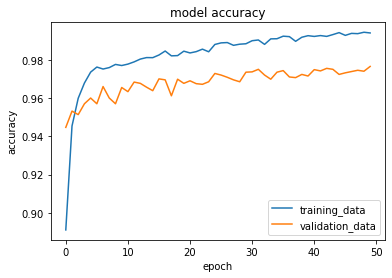


Tetsing data with adam optimizer accuracy:  0.97

Tetsing data with adam optimizer loss:  1.15
10000/10000 [==============================] - 0s 33us/step

adamax
Training time:  332.140625


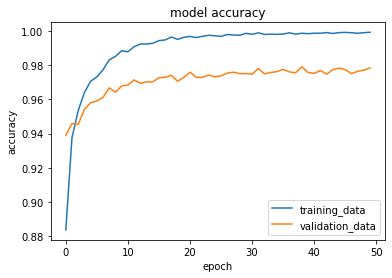


Tetsing data with adamax optimizer accuracy:  0.98

Tetsing data with adamax optimizer loss:  0.59
10000/10000 [==============================] - 0s 33us/step

nadam
Training time:  395.28125


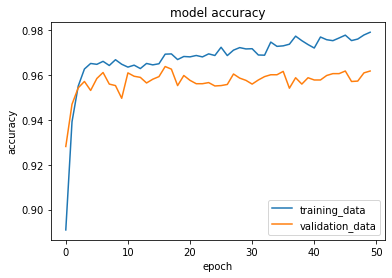


Tetsing data with nadam optimizer accuracy:  0.96

Tetsing data with nadam optimizer loss:  1.03


In [16]:
import time
for i in range(len(optimizers)):
    model = model_1(number_of_features, number_of_unique_outcomes)
    model.compile(optimizer = optimizers[i],
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    start = time.process_time()
    history = model.fit(x = X_train,
                        y = y_train,
                        batch_size = 128,
                        epochs = 50,
                        verbose = 0,
                        validation_split = 0.1)
    stop = time.process_time()
    history_list.append(history)
    loss, accuracy = model.evaluate(x = X_test,
                                    y = y_test)
    print()
    print('{}'.format(optimizers[i]))
    print("Training time: ", stop - start)
    model_accuracy_plot(history)
    print()
    print('Tetsing data with {} optimizer accuracy: '.format(optimizers[i]), round(accuracy, 2))
    print()
    print('Tetsing data with {} optimizer loss: '.format(optimizers[i]), round(loss, 2))


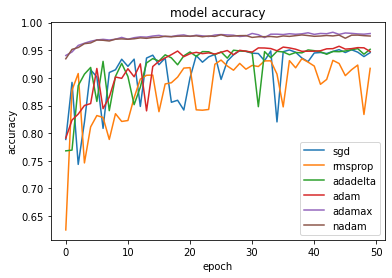

In [17]:


# Cleaner visulizations all in one place
for optimizer, history in zip(optimizers, history_list):
    plt.plot(history.history['val_accuracy'])
    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(optimizers, loc='best')
plt.show()



10000/10000 [==============================] - 0s 27us/step

sgd
Training time:  114.15625


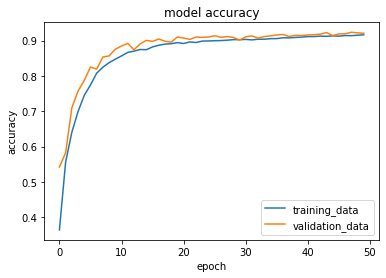


Tetsing data with sgd optimizer accuracy:  0.91

Tetsing data with sgd optimizer loss:  0.34
10000/10000 [==============================] - 0s 28us/step

rmsprop
Training time:  165.234375


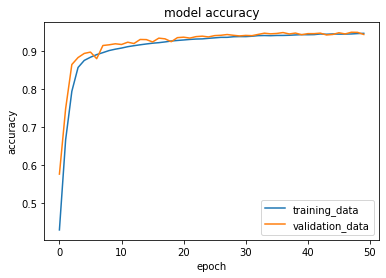


Tetsing data with rmsprop optimizer accuracy:  0.94

Tetsing data with rmsprop optimizer loss:  0.25
10000/10000 [==============================] - 0s 36us/step

adadelta
Training time:  178.484375


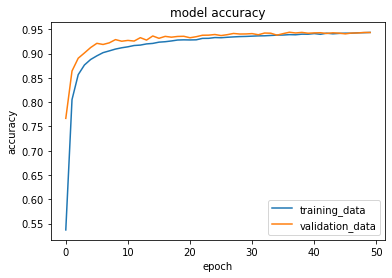


Tetsing data with adadelta optimizer accuracy:  0.93

Tetsing data with adadelta optimizer loss:  0.25
10000/10000 [==============================] - 0s 28us/step

adam
Training time:  186.234375


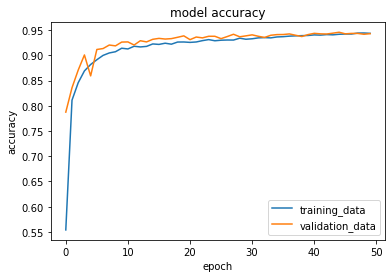


Tetsing data with adam optimizer accuracy:  0.93

Tetsing data with adam optimizer loss:  0.28
10000/10000 [==============================] - 0s 28us/step

adamax
Training time:  171.5


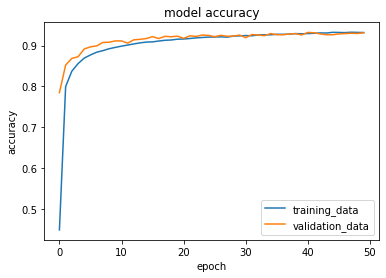


Tetsing data with adamax optimizer accuracy:  0.92

Tetsing data with adamax optimizer loss:  0.29
10000/10000 [==============================] - 0s 35us/step

nadam
Training time:  201.0625


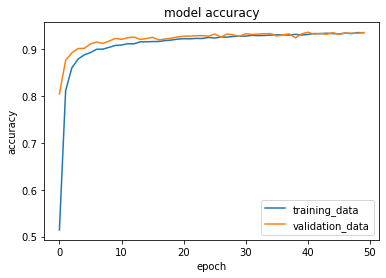


Tetsing data with nadam optimizer accuracy:  0.93

Tetsing data with nadam optimizer loss:  0.28


In [21]:
import time
for i in range(len(optimizers)):
    model = model_2(number_of_features, number_of_unique_outcomes)
    model.compile(optimizer = optimizers[i],
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    start = time.process_time()
    history = model.fit(x = X_train,
                        y = y_train,
                        batch_size = 128,
                        epochs = 50,
                        verbose = 0,
                        validation_split = 0.1)
    stop = time.process_time()
    history_list.append(history)
    loss, accuracy = model.evaluate(x = X_test,
                                    y = y_test)
    print()
    print('{}'.format(optimizers[i]))
    print("Training time: ", stop - start)
    model_accuracy_plot(history)
    print()
    print('Tetsing data with {} optimizer accuracy: '.format(optimizers[i]), round(accuracy, 2))
    print()
    print('Tetsing data with {} optimizer loss: '.format(optimizers[i]), round(loss, 2))


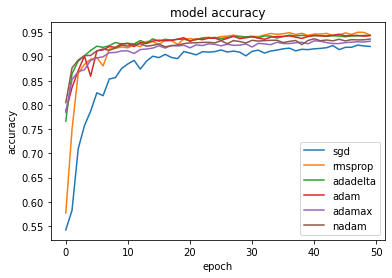

In [22]:


# Cleaner visulizations all in one place
for optimizer, history in zip(optimizers, history_list):
    plt.plot(history.history['val_accuracy'])
    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(optimizers, loc='best')
plt.show()





We can tell this model is much better, and all of the optimizers are able to achieve a 90%+ accuracy.

It's also worth noting that all of these optimizers have their own hyper-parameters that can be fined tuned even further. These paramters, such as the learning rate, can impact the size of the adjustments we make beyond the definition of these algorithms.

The Keras documentation and ML-Cheatsheet both provide documentation on these hyper-paramters, which can be worth exploring: